In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [115]:
SP_STOP = set(stopwords.words('spanish'))
verde_si = '#2E8B57'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[verde_si])
sns.set_style('whitegrid')

In [116]:
df = pd.read_csv("comments.csv")

In [117]:
df.head()

,post_id,comment_id,username,comment_text,like_count,timestamp
0,17960507093778558,18039715793256177,NaN,Gran noticia! 👏,0,2025-04-25T15:58:04+0000
1,17960507093778558,18040437554627744,NaN,"Alguien hizo estudio de impacto ambiental, sac...",0,2025-04-25T15:53:56+0000
2,17960507093778558,18014011865707327,NaN,Porque no arreglan primero las cosas que está...,0,2025-04-25T15:49:22+0000
3,17960507093778558,18306351922243406,NaN,❤️👏👏👏,0,2025-04-25T15:37:52+0000
4,17960507093778558,18064217213475366,NaN,"De la suciedad en las calles , autos abandonad...",0,2025-04-25T15:34:41+0000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062 entries, 0 to 4061
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       4062 non-null   int64 
 1   comment_id    4062 non-null   int64 
 2   username      184 non-null    object
 3   comment_text  4059 non-null   object
 4   like_count    4062 non-null   int64 
 5   timestamp     4062 non-null   object
dtypes: int64(3), object(3)
memory usage: 190.5+ KB


In [119]:
df.describe(include='all')

,post_id,comment_id,username,comment_text,like_count,timestamp
count,4.062000e+03,4.062000e+03,184,4059,4062.000000,4062
unique,NaN,NaN,1,3627,NaN,4054
top,NaN,NaN,sanisidrogob,👏👏👏,NaN,2025-03-21T13:44:57+0000
freq,NaN,NaN,184,57,NaN,2
mean,1.810808e+16,1.805702e+16,NaN,NaN,1.611029,NaN
std,1.898295e+14,1.372938e+14,NaN,NaN,5.144966,NaN
min,1.784246e+16,1.784200e+16,NaN,NaN,0.000000,NaN
25%,1.802533e+16,1.797195e+16,NaN,NaN,0.000000,NaN
50%,1.805393e+16,1.805065e+16,NaN,NaN,0.000000,NaN
75%,1.808095e+16,1.808244e+16,NaN,NaN,2.000000,NaN


In [120]:
df_filtered = df[df['username'].isna()==True]

In [121]:
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'], errors='coerce')

# Longitudes del comentario
df_filtered['char_len']  = df_filtered['comment_text'].str.len()
df_filtered['word_len']  = df_filtered['comment_text'].str.split().str.len()

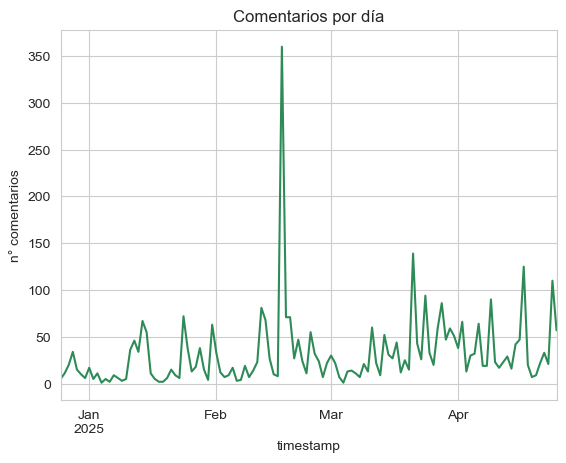

In [122]:
fig, ax = plt.subplots()
(df_filtered
 .set_index('timestamp')
 .resample('D')['comment_id']     # comentarios por día
 .count()
 .plot(ax=ax, lw=1.5))
ax.set_title('Comentarios por día')
ax.set_ylabel('n° comentarios')
plt.show()

# Luego ver por que hay un pico tan grande a mitad de febrero

In [227]:
(df_filtered
 .set_index('timestamp')
 .resample('D')['comment_id']     # comentarios por día
 .count()).reset_index().query("comment_id == 360")

,timestamp,comment_id
54,2025-02-17 00:00:00+00:00,360


In [236]:
df_filtered[df_filtered['timestamp'].astype(str).str.contains('2025-02-17')]

,post_id,comment_id,username,comment_text,like_count,timestamp,char_len,word_len,hour,tokens,possible_complaint,sentiment
2553,18493669975008278,18297480832213829,NaN,Garrido fue y es sinónimo de honestidad y voca...,0,2025-02-17 23:55:56+00:00,98.0,16.0,23,"[garrido, sinónimo, honestidad, vocación, serv...",True,0.0
2554,18493669975008278,18057035621294107,NaN,Sigue en nosotros porque marco la diferencia l...,0,2025-02-17 23:52:39+00:00,326.0,61.0,23,"[sigue, marco, diferencia, vocación, servicio,...",True,0.0
2555,18493669975008278,17968899833832591,NaN,Nos seguirá cuidando siempre,1,2025-02-17 23:52:00+00:00,28.0,4.0,23,"[seguirá, cuidando, siempre]",False,0.0
2556,18493669975008278,18031965758281042,NaN,"Garrido, inolvidable 💔",0,2025-02-17 23:50:28+00:00,22.0,3.0,23,"[garrido, inolvidable]",False,0.0
2557,18493669975008278,18272018914270481,NaN,❤️❤️❤️❤️❤️❤️❤️,0,2025-02-17 23:50:02+00:00,14.0,1.0,23,[],False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2941,18046115423217444,18348822454195380,NaN,Que lindo poder hacer algo asi en el barrio La...,0,2025-02-17 13:45:54+00:00,127.0,23.0,13,"[lindo, poder, hacer, asi, barrio, vinca, boul...",False,0.0
2955,18468868831070418,18075383032674811,NaN,@joa_pascua21 yo las gomas del auto y mi marid...,0,2025-02-17 11:09:15+00:00,52.0,11.0,11,"[gomas, auto, marido]",False,0.0
2956,18468868831070418,18041612822375380,NaN,@maria_dolores_mendoza si es esa,1,2025-02-17 03:02:59+00:00,32.0,4.0,3,"[mariadoloresmendoza, si]",False,0.0
2957,18468868831070418,18030660437313587,NaN,La mejor estacion,0,2025-02-17 02:50:56+00:00,17.0,3.0,2,"[mejor, estacion]",False,0.0


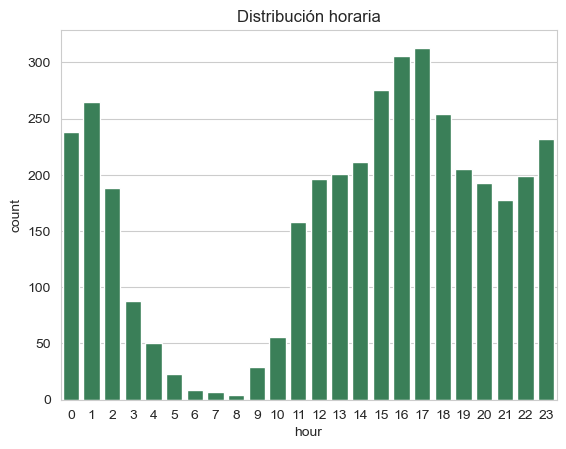

In [123]:
# Horas pico

df_filtered['hour'] = df_filtered['timestamp'].dt.hour
sns.countplot(data=df_filtered, x='hour')
plt.title('Distribución horaria')
plt.show()

In [124]:
df_filtered

,post_id,comment_id,username,comment_text,like_count,timestamp,char_len,word_len,hour
0,17960507093778558,18039715793256177,NaN,Gran noticia! 👏,0,2025-04-25 15:58:04+00:00,15.0,3.0,15
1,17960507093778558,18040437554627744,NaN,"Alguien hizo estudio de impacto ambiental, sac...",0,2025-04-25 15:53:56+00:00,82.0,13.0,15
2,17960507093778558,18014011865707327,NaN,Porque no arreglan primero las cosas que está...,0,2025-04-25 15:49:22+00:00,326.0,58.0,15
3,17960507093778558,18306351922243406,NaN,❤️👏👏👏,0,2025-04-25 15:37:52+00:00,5.0,1.0,15
4,17960507093778558,18064217213475366,NaN,"De la suciedad en las calles , autos abandonad...",0,2025-04-25 15:34:41+00:00,189.0,32.0,15
...,...,...,...,...,...,...,...,...,...
4057,17986289807619587,18020717024351691,NaN,Feliz Navidad ❤️,1,2024-12-25 18:52:19+00:00,16.0,3.0,18
4058,17986289807619587,18157895497329931,NaN,Feliz Navidad!!!,2,2024-12-25 16:43:58+00:00,16.0,2.0,16
4059,17986289807619587,18061998256721823,NaN,Feliz Navidad!! Los mejores deseos 🥂,2,2024-12-25 16:16:33+00:00,36.0,6.0,16
4060,17986289807619587,18102648661472703,NaN,Feliz Navidad! ❤️,2,2024-12-25 15:26:30+00:00,17.0,3.0,15


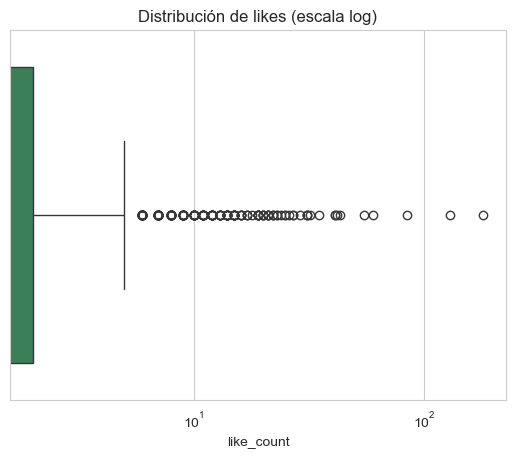

,count,mean,sum
comment_id,,,
18056649299012754,1,181.0,181
18053147234134132,1,129.0,129
18033172172263363,1,84.0,84
17938554731967564,1,60.0,60
18125791801414371,1,55.0,55


In [125]:
# Suma de likes totales en los comentarios

sns.boxplot(data=df_filtered, x='like_count')
plt.xscale('log')
plt.title('Distribución de likes (escala log)')
plt.show()

likes_post = (df_filtered.groupby('comment_id')['like_count']
                .agg(['count', 'mean', 'sum'])
                .sort_values('sum', ascending=False))
likes_post.head()

## Analisis de texto

In [126]:
nltk.download('punkt_tab')

def limpiar(texto):
    texto = texto.lower()  # quitar urls
    texto = texto.translate(str.maketrans('', '', string.punctuation+'¡¿'))
    tokens = word_tokenize(texto, language='spanish')
    tokens = [t for t in tokens if t not in SP_STOP and t.isalpha()]
    return tokens

df_filtered['tokens'] = df_filtered['comment_text'].fillna('').apply(limpiar)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [160]:
# Palabras más frecuentes
todo = Counter([tok for sub in df_filtered['tokens'] for tok in sub])
pd.DataFrame(todo.most_common(30), columns=['token', 'freq']).head(30)

eliminar = ['san', 'isidro', 'si', 'q', 'hace', 'calle', 'x']
for i in eliminar:
    del todo[i]

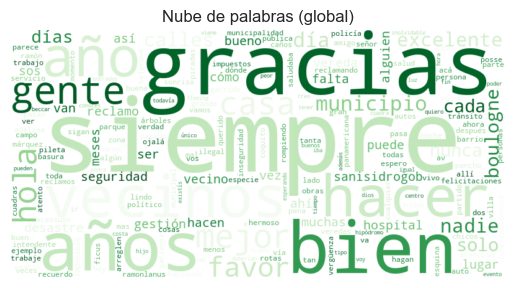

In [161]:
# WordCloud rápido
wc = WordCloud(width=800, height=400, background_color='white', colormap="Greens").generate_from_frequencies(todo)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off'); plt.title('Nube de palabras (global)'); plt.show()

In [129]:
# Bigrams frecuentes
from nltk.util import ngrams
bigrams = Counter(ngr for sub in df_filtered['tokens'] for ngr in ngrams(sub, 2))
pd.DataFrame(bigrams.most_common(20), columns=['bigram','freq']).head(20)

,bigram,freq
0,"(san, isidro)",288
1,"(villa, adelina)",44
2,"(municipalidad, san)",38
3,"(muchas, gracias)",37
4,"(hace, años)",36
5,"(nadie, hace)",34
6,"(isidro, si)",33
7,"(vía, pública)",33
8,"(si, sos)",32
9,"(hace, meses)",30


In [130]:
# trigrams frecuentes
trigrams = Counter(ngr for sub in df_filtered['tokens'] for ngr in ngrams(sub, 3))
pd.DataFrame(trigrams.most_common(20), columns=['trigram','freq']).head(20)

,trigram,freq
0,"(municipalidad, san, isidro)",37
1,"(san, isidro, si)",33
2,"(ficus, especie, ilegal)",29
3,"(rompiendo, caños, casa)",29
4,"(lamentablemente, municipalidad, san)",26
5,"(isidro, si, sos)",26
6,"(si, sos, pariente)",26
7,"(sos, pariente, algún)",26
8,"(pariente, algún, político)",26
9,"(algún, político, amigo)",26


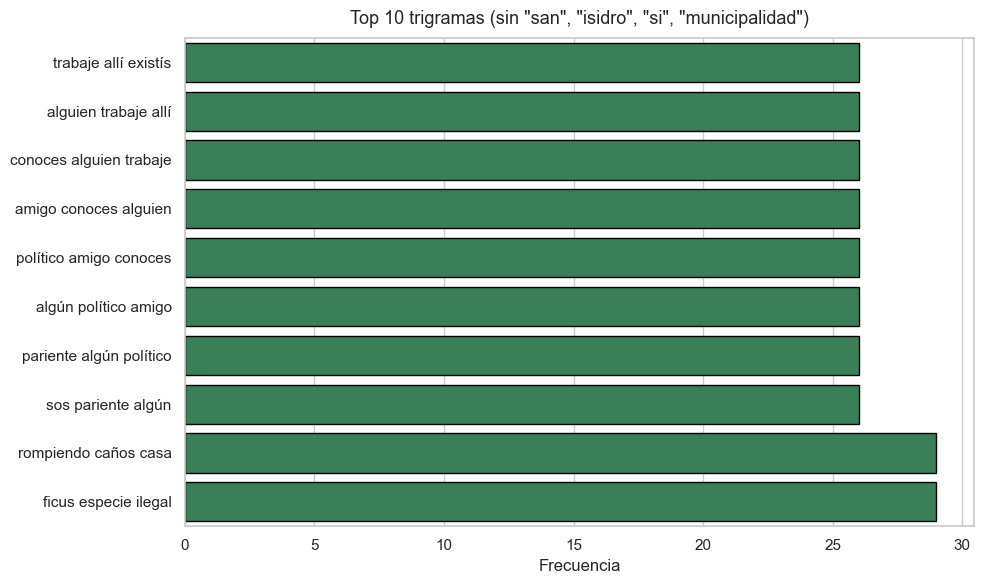

In [170]:
trigrams = Counter(
    ngr
    for toks in df_filtered['tokens']
    for ngr in ngrams(toks, 3)
)

baneadas = {'san', 'isidro', 'si', 'municipalidad'}
trigrams_filtrados = Counter(
    {
        ' '.join(tg): freq            # convierto la tupla a string
        for tg, freq in trigrams.items()
        if all(w not in baneadas for w in tg)
    }
)

TOP_N = 10
df_trig = pd.DataFrame(
    trigrams_filtrados.most_common(TOP_N),
    columns=['trigram', 'freq']
)

# Ordena de menor a mayor para que las barras queden agradables
df_trig = df_trig.iloc[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_trig,
    x='freq',
    y='trigram',
    color='#2E8B57',
    edgecolor='black'      # escala de verdes, más oscuro = más frecuencia
)

plt.title(f'Top {TOP_N} trigramas (sin "san", "isidro", "si", "municipalidad")',
          fontsize=13, pad=10)
plt.xlabel('Frecuencia')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [131]:
CLUES = [
    'arreglen', 'arreglar', 'arreglan', 'arreglo', 'arreglaron',
    'reclamo', 'reclaman', 'queja', 'problema', 'cuando', 'suciedad',
    'basura', 'mal', 'pésimo', 'pesimo', 'nunca', 'tardan', 'abandona', 'inseguridad',
    'baches', 'calles', 'falta', 'servicio', 'horrible', 'vergüenza', 'verguenza', 'denuncia', 'lamentablemente', 'lamentable'
]
regex = re.compile(r'\b(' + '|'.join(CLUES) + r')\b', flags=re.IGNORECASE)

df_filtered['possible_complaint'] = df_filtered['comment_text'].fillna('').str.contains(regex)

In [132]:
complaint_rate = df_filtered['possible_complaint'].mean()
print(f"Porcentaje de comentarios que mencionan posibles quejas: {complaint_rate:.2%}")

Porcentaje de comentarios que mencionan posibles quejas: 15.42%


## Analisis de sentimiento con VADER

In [133]:
sia = SentimentIntensityAnalyzer()
df_filtered['sentiment'] = df_filtered['comment_text'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])

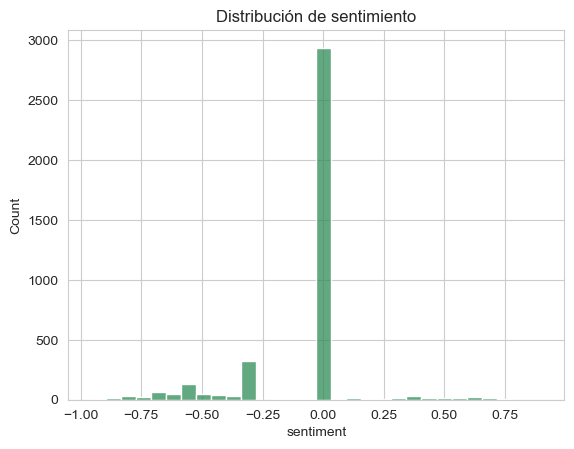

In [134]:
sns.histplot(df_filtered['sentiment'], bins=30)
plt.title('Distribución de sentimiento')
plt.show()

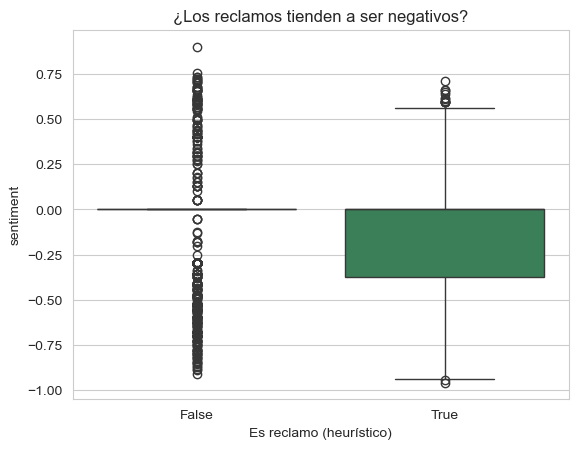

In [135]:
# Correlación sentimiento vs. flag de reclamo
sns.boxplot(data=df_filtered, x='possible_complaint', y='sentiment')
plt.title('¿Los reclamos tienden a ser negativos?')
plt.xlabel('Es reclamo (heurístico)')
plt.show()

<Axes: >

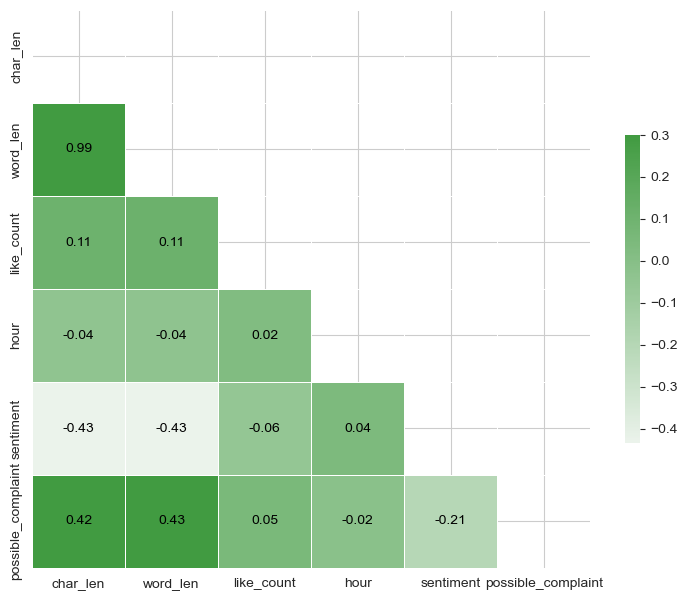

In [149]:
eda_features = df_filtered[['char_len', 'word_len', 'like_count', 'hour', 'sentiment', 'possible_complaint']]
corr = eda_features.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 8))

# Generate a custom diverging colormap
cmap = sns.light_palette("#228B22", n_colors=256, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True,
            fmt='.2f',
            annot_kws={"size":10, "color":"black"}
            )

In [152]:
# Tabla comparativa de métricas entre reclamos y no reclamos
comp = (df_filtered.groupby('possible_complaint')
          .agg(avg_likes=('like_count','mean'),
               median_len=('word_len','median'),
               avg_sent=('sentiment','mean'),
               comentarios=('comment_id','count')))
comp

,avg_likes,median_len,avg_sent,comentarios
possible_complaint,,,,
False,1.552744,7.0,-0.049999,3280
True,2.314381,28.0,-0.181892,598


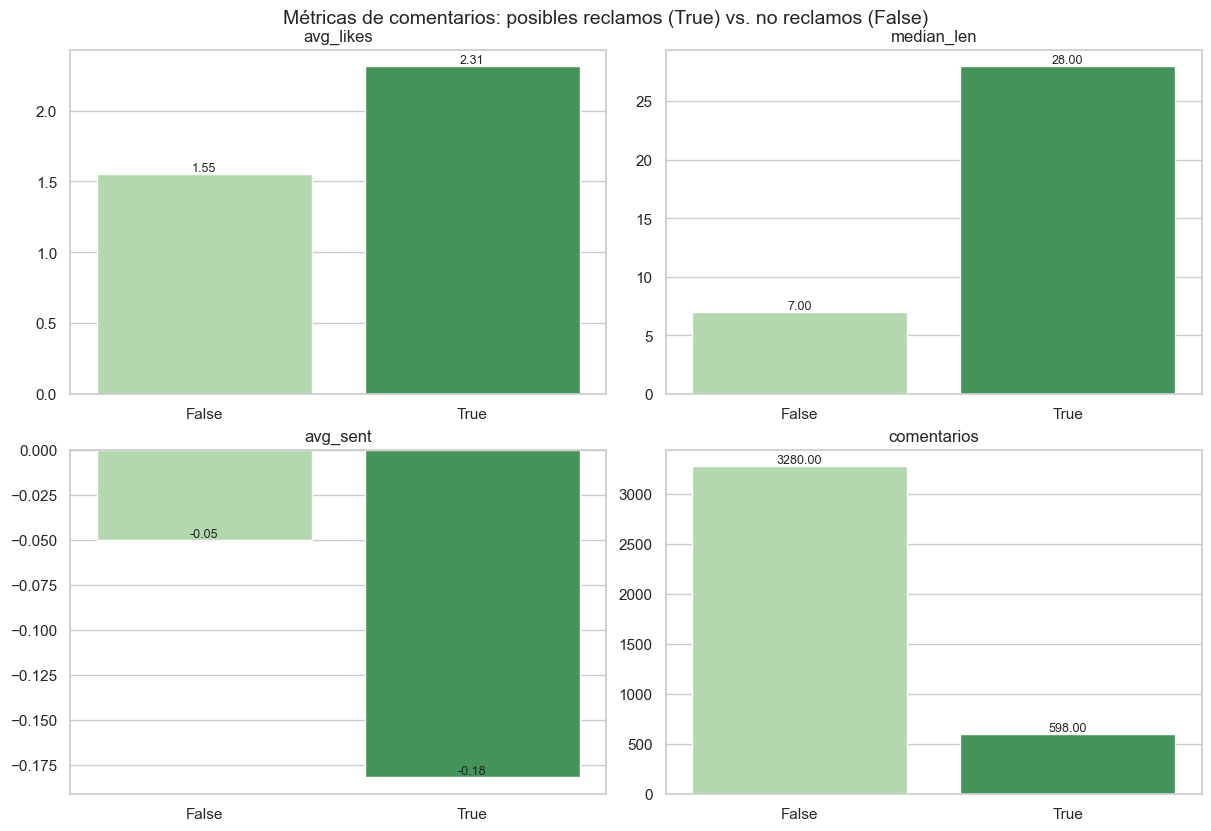

In [154]:
sns.set_theme(style="whitegrid")      # estilo opcional
metricas = comp.columns               # ['avg_likes', 'median_len', 'avg_sent', 'comentarios']

fig, axes = plt.subplots(
    nrows=2, ncols=2,                 # 2×2 = 4 subplots
    figsize=(12, 8),
    constrained_layout=True           # ajusta márgenes automáticamente
)

# Aplanamos la matriz de ejes para iterar más simple
for ax, metrica in zip(axes.flatten(), metricas):
    # ----- barras “False” vs “True” -----
    sns.barplot(
        x=comp.index.astype(str),     # convierte índice booleano a texto
        y=comp[metrica],
        palette="Greens",
        ax=ax
    )

    # Etiquetas y título
    ax.set_title(metrica, fontsize=12, pad=6)
    ax.set_xlabel("")                 # quitamos label innecesario
    ax.set_ylabel("")                 # o pon ax.set_ylabel(metrica) si lo prefieres

    # ----- valor numérico encima de cada barra -----
    for p in ax.patches:
        altura = p.get_height()
        ax.annotate(
            f"{altura:.2f}",
            (p.get_x() + p.get_width() / 2, altura),
            ha="center", va="bottom", fontsize=9
        )

plt.suptitle("Métricas de comentarios: posibles reclamos (True) vs. no reclamos (False)", fontsize=14, y=1.02)
plt.show()

In [138]:
df_filtered[df_filtered['sentiment']<0]

,post_id,comment_id,username,comment_text,like_count,timestamp,char_len,word_len,hour,tokens,possible_complaint,sentiment
2,17960507093778558,18014011865707327,NaN,Porque no arreglan primero las cosas que está...,0,2025-04-25 15:49:22+00:00,326.0,58.0,15,"[arreglan, primero, cosas, rotas, caso, dos, m...",True,-0.4724
4,17960507093778558,18064217213475366,NaN,"De la suciedad en las calles , autos abandonad...",0,2025-04-25 15:34:41+00:00,189.0,32.0,15,"[suciedad, calles, autos, abandonados, contene...",True,-0.5574
22,18049674734346443,18045436619144261,NaN,@sosa.mariano ese no es Mario que trabajaba en...,0,2025-04-25 03:13:13+00:00,57.0,10.0,3,"[sosamariano, mario, trabajaba, coquito]",False,-0.2960
24,18049674734346443,18076508014837944,NaN,QUE DECISIÓN VA A TOMAR EL MUNICIPIO con respe...,0,2025-04-25 02:49:31+00:00,345.0,65.0,2,"[decisión, va, tomar, municipio, respecto, pic...",False,-0.7470
25,18049674734346443,18081962035709411,NaN,"Podras haber mejores panchos, pero Coquito tie...",0,2025-04-25 02:22:00+00:00,260.0,44.0,2,"[podras, haber, mejores, panchos, coquito, his...",True,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,18066529195747137,18290034331215203,NaN,Hacer controles en avenidas… es un show. V. Lo...,11,2024-12-28 16:27:21+00:00,104.0,21.0,16,"[hacer, controles, show, v, lopez, hace, calle...",True,-0.4466
4007,18066529195747137,18072638803635934,NaN,Si quieren atrapar a muchos en infracción vaya...,3,2024-12-28 16:16:36+00:00,241.0,42.0,16,"[si, quieren, atrapar, infracción, vayan, siem...",True,-0.2960
4016,18042720233014010,18042997904191080,NaN,@traversomargarita no gracias,0,2024-12-29 01:19:59+00:00,29.0,3.0,1,"[traversomargarita, gracias]",False,-0.2960
4036,18037154117346020,17958929657747987,NaN,Deberían facilitar los turnos para los ciudada...,0,2025-01-22 13:28:23+00:00,272.0,50.0,13,"[deberían, facilitar, turnos, ciudadanos, pare...",True,-0.5267


In [139]:
df_filtered[df_filtered['comment_id']==18290034331215203]['comment_text'].to_list()

['Hacer controles en avenidas… es un show. V. Lopez lo hace en calles de barrios …. Donde NO SE LO ESPERAN']

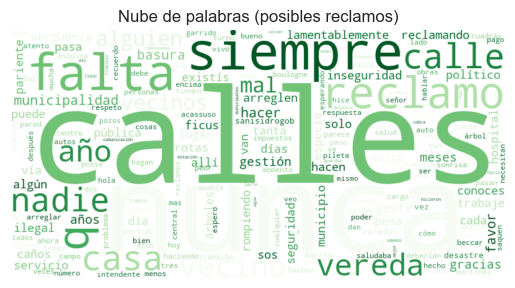

In [142]:
todo_quejas = Counter([tok for sub in df_filtered[df_filtered['possible_complaint']]['tokens'] for tok in sub])
borrar_elementos = ['si', 'hace', 'san', 'isidro']
for i in borrar_elementos:
    del todo_quejas[i]
pd.DataFrame(todo_quejas.most_common(30), columns=['token', 'freq']).head(30)

wc_quejas = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(todo_quejas)
plt.imshow(wc_quejas, interpolation='bilinear')
plt.axis('off'); plt.title('Nube de palabras (posibles reclamos)'); plt.show()

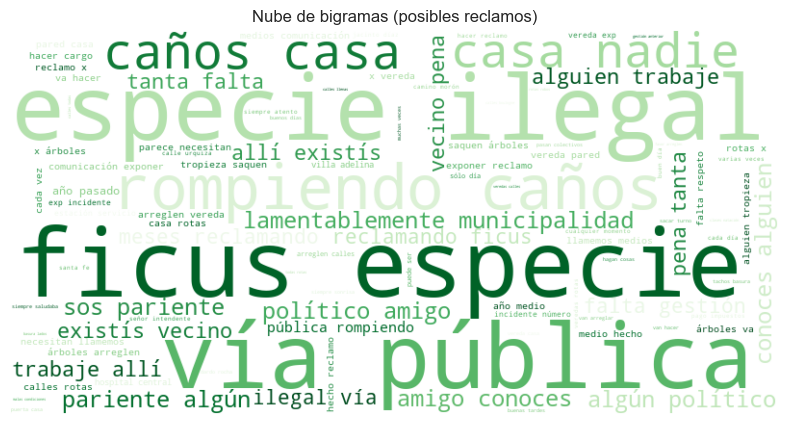

In [ ]:
from itertools import tee

def bigramas(tokens):
    """Devuelve bigramas como strings 'palabra1 palabra2'."""
    a, b = tee(tokens)
    next(b, None)                 # desplaza el segundo iterador
    return [' '.join(bg) for bg in zip(a, b)]

bigr_counter = Counter(
    bg
    for toks in df_filtered.loc[df_filtered['possible_complaint'], 'tokens']
    for bg in bigramas(toks)
)

borrar_set = set(['si', 'hace', 'san', 'isidro'])   # o reutiliza tu lista
for bg in list(bigr_counter):                       # list() para iterar copia
    if any(w in borrar_set for w in bg.split()):
        del bigr_counter[bg]

TOP_N = 100
bigr_counter = Counter(dict(bigr_counter.most_common(TOP_N)))

wc_bigr = WordCloud(width=800,
                    height=400,
                    background_color='white',
                    colormap='Greens',
                    collocations=False).generate_from_frequencies(bigr_counter)

plt.figure(figsize=(10, 5))
plt.imshow(wc_bigr, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de bigramas (posibles reclamos)')
plt.show()

In [171]:
df_filtered

,post_id,comment_id,username,comment_text,like_count,timestamp,char_len,word_len,hour,tokens,possible_complaint,sentiment
0,17960507093778558,18039715793256177,NaN,Gran noticia! 👏,0,2025-04-25 15:58:04+00:00,15.0,3.0,15,"[gran, noticia]",False,0.0000
1,17960507093778558,18040437554627744,NaN,"Alguien hizo estudio de impacto ambiental, sac...",0,2025-04-25 15:53:56+00:00,82.0,13.0,15,"[alguien, hizo, estudio, impacto, ambiental, s...",False,0.0000
2,17960507093778558,18014011865707327,NaN,Porque no arreglan primero las cosas que está...,0,2025-04-25 15:49:22+00:00,326.0,58.0,15,"[arreglan, primero, cosas, rotas, caso, dos, m...",True,-0.4724
3,17960507093778558,18306351922243406,NaN,❤️👏👏👏,0,2025-04-25 15:37:52+00:00,5.0,1.0,15,[],False,0.0000
4,17960507093778558,18064217213475366,NaN,"De la suciedad en las calles , autos abandonad...",0,2025-04-25 15:34:41+00:00,189.0,32.0,15,"[suciedad, calles, autos, abandonados, contene...",True,-0.5574
...,...,...,...,...,...,...,...,...,...,...,...,...
4057,17986289807619587,18020717024351691,NaN,Feliz Navidad ❤️,1,2024-12-25 18:52:19+00:00,16.0,3.0,18,"[feliz, navidad]",False,0.0000
4058,17986289807619587,18157895497329931,NaN,Feliz Navidad!!!,2,2024-12-25 16:43:58+00:00,16.0,2.0,16,"[feliz, navidad]",False,0.0000
4059,17986289807619587,18061998256721823,NaN,Feliz Navidad!! Los mejores deseos 🥂,2,2024-12-25 16:16:33+00:00,36.0,6.0,16,"[feliz, navidad, mejores, deseos]",False,0.0000
4060,17986289807619587,18102648661472703,NaN,Feliz Navidad! ❤️,2,2024-12-25 15:26:30+00:00,17.0,3.0,15,"[feliz, navidad]",False,0.0000


In [172]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3878 entries, 0 to 4061
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   post_id             3878 non-null   int64              
 1   comment_id          3878 non-null   int64              
 2   username            0 non-null      object             
 3   comment_text        3875 non-null   object             
 4   like_count          3878 non-null   int64              
 5   timestamp           3878 non-null   datetime64[ns, UTC]
 6   char_len            3875 non-null   float64            
 7   word_len            3875 non-null   float64            
 8   hour                3878 non-null   int32              
 9   tokens              3878 non-null   object             
 10  possible_complaint  3878 non-null   bool               
 11  sentiment           3878 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](1), flo

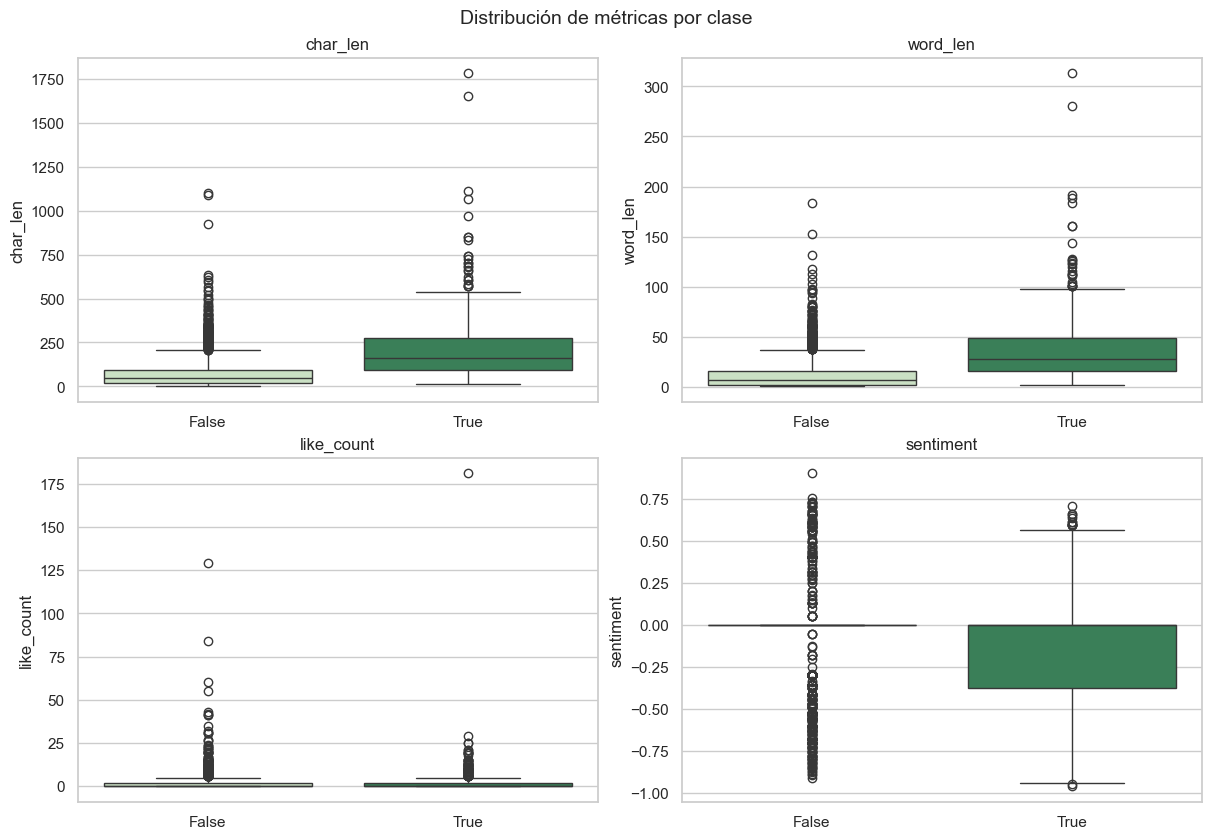

In [173]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
num_cols = ['char_len', 'word_len', 'like_count', 'sentiment']

for ax, col in zip(axs.flatten(), num_cols):
    sns.boxplot(data=df_filtered, y=col, x='possible_complaint',
                palette=['#C7E4C0', '#2E8B57'], ax=ax)
    ax.set_xlabel('')          # limpia etiqueta
    ax.set_title(col)

plt.suptitle('Distribución de métricas por clase', y=1.03, fontsize=14)
plt.show()

In [212]:
df_filtered.query('possible_complaint == True & sentiment > 0')

,post_id,comment_id,username,comment_text,like_count,timestamp,char_len,word_len,hour,tokens,possible_complaint,sentiment
98,18049674734346443,17953316996796694,NaN,Gracias pancho por alimentarme esos días en el...,0,2025-04-24 17:12:23+00:00,132.0,22.0,17,"[gracias, pancho, alimentarme, días, ahorrando...",True,0.5622
240,18026444198457339,18369278818130731,NaN,GENTE ESTO ES INCREÍBLE.... POR FAVOR NO OLVID...,1,2025-04-17 18:36:56+00:00,386.0,62.0,18,"[gente, increíble, favor, olvidar, próximas, v...",True,0.3956
360,18098229253530340,18342246742082444,NaN,Por favor arreglar la mitad de la calle Urugua...,0,2025-04-22 00:53:54+00:00,111.0,22.0,0,"[favor, arreglar, mitad, calle, uruguay, perte...",True,0.4019
402,17966991146892597,18021369635499826,NaN,"Imposible transitar por la calle Urquiza, en A...",2,2025-04-16 01:06:00+00:00,126.0,20.0,1,"[imposible, transitar, calle, urquiza, acassus...",True,0.4019
407,17966991146892597,17866034529363209,NaN,Pónganse las pilas en arreglar los tremendos p...,3,2025-04-15 23:52:16+00:00,228.0,37.0,23,"[pónganse, pilas, arreglar, tremendos, pozos, ...",True,0.6371
661,18379993336186768,17901853785158155,NaN,"Hermoso lugar, también falta el sonido de los ...",0,2025-04-15 01:25:45+00:00,77.0,12.0,1,"[hermoso, lugar, falta, sonido, puccio, nooooo...",True,0.2732
665,18379993336186768,17961088601913465,NaN,Es muy lindo San Isidro!!pero estamos viviendo...,3,2025-04-13 21:29:03+00:00,89.0,12.0,21,"[lindo, san, isidropero, viviendo, inseguridad...",True,0.5951
915,18055533821330047,17949276242827604,NaN,"Hola , Bermejo entre Sucre y Av. Rolón, son to...",0,2025-04-16 11:36:29+00:00,179.0,32.0,11,"[hola, bermejo, sucre, av, rolón, parches, mal...",True,0.5951
936,18055533821330047,18081054652660331,NaN,"Sr. Intendente, en Boulogne hay muchas calles ...",0,2025-04-04 15:30:47+00:00,161.0,24.0,15,"[sr, intendente, boulogne, muchas, calles, int...",True,0.6597
972,18055533821330047,18044663315593052,NaN,POR FAVOR ARREGLEN EL POZO QUE HAY EN CAMINO M...,0,2025-03-31 20:45:25+00:00,176.0,30.0,20,"[favor, arreglen, pozo, camino, morón, costean...",True,0.6145


In [216]:
df_filtered.query("comment_id == 17945917703809423")['comment_text'].to_list()

['Hola!! Venimos reclamando desde que esta el Parque Publico del Gold,plan de manejo,baños ,seguridad ,iluminacion.\nQue se respete y se cuide porque es Paisaje Protegido.\nHicimos notas reuniones hasta noviembre 2024 ,d4onde se voto a favor en una Sesion del HCD ,se aprobo nuestro reclamo...( Asamblea de vecinos del Golf de V.Adelina)']

In [ ]:
# 1) Conteo por (hora, posible_complaint)
counts = df_filtered.groupby(['hour', 'possible_complaint']).size()

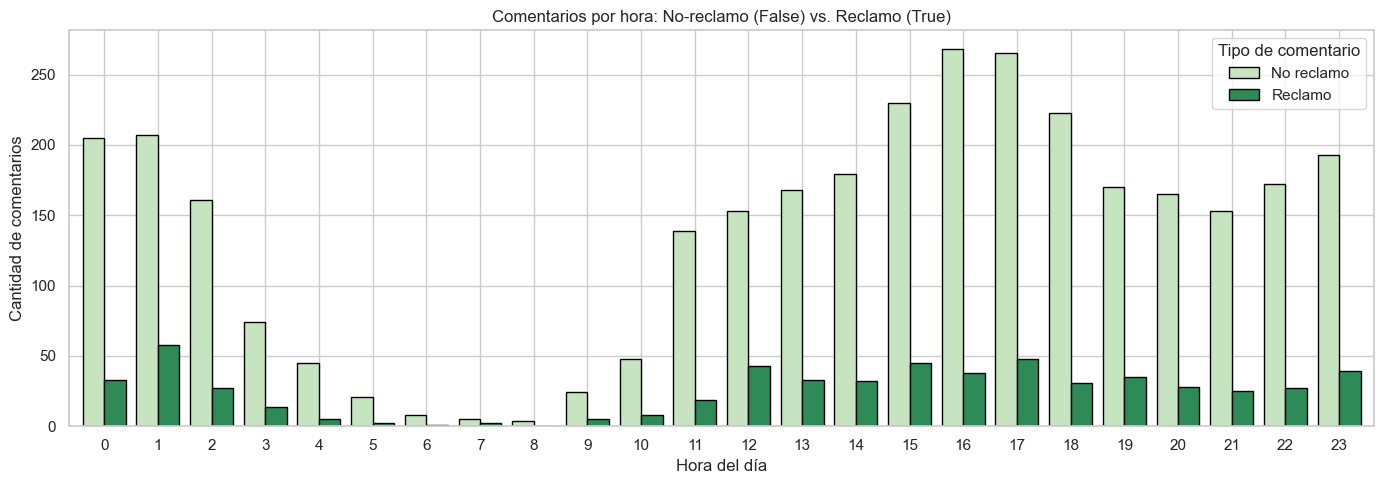

In [205]:

counts_df = counts.unstack(level='possible_complaint', fill_value=0)

# 3) Plot en barras agrupadas
ax = counts_df.plot(
    kind='bar',
    figsize=(14, 5),
    width=0.8,
    color=['#C7E4C0', '#2E8B57'],   # primero False, luego True
    edgecolor='black'
)

# 4) Detalles de estilo
ax.set_xlabel('Hora del día')
ax.set_ylabel('Cantidad de comentarios')
ax.set_title('Comentarios por hora: No-reclamo (False) vs. Reclamo (True)')
ax.legend(['No reclamo', 'Reclamo'], title='Tipo de comentario')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [178]:
from collections import Counter
from nltk.util import ngrams

# unigrams
freq_true  = Counter(t for sub in df_filtered[df_filtered.possible_complaint].tokens for t in sub)
freq_false = Counter(t for sub in df_filtered[~df_filtered.possible_complaint].tokens for t in sub)

# razón de prevalencias (log-odds simplificado)
import pandas as pd, numpy as np
vocab = set(freq_true) | set(freq_false)
df_tok = pd.DataFrame({
    'token': list(vocab),
    'true':  [freq_true[t]  for t in vocab],
    'false': [freq_false[t] for t in vocab]
})
df_tok['log_odds'] = np.log((df_tok['true']+0.5)/(df_tok['false']+0.5))
df_tok.sort_values('log_odds', ascending=False).head(20)


,token,true,false,log_odds
4644,calles,93,0,5.231109
7301,nunca,80,0,5.081404
3831,falta,72,0,4.976734
2344,reclamo,69,0,4.934474
4151,mal,48,0,4.574711
6190,basura,43,0,4.465908
4895,vergüenza,35,0,4.262680
7585,lamentablemente,34,0,4.234107
3117,servicio,34,0,4.234107
5360,inseguridad,34,0,4.234107
